In [1]:
import pandas as pd

In [2]:
# Series de pandas
numeros = [3,5,7,9]
series = pd.Series(numeros)
series, type(series)

(0    3
 1    5
 2    7
 3    9
 dtype: int64,
 pandas.core.series.Series)

In [3]:
data = {
    "Nombre": ["Ana", "Luis", "Carlos", "Marta"],
    "Edad":[20, 43, 18, 35],
    "Ciudad":["Madrid", "Medellin", "Valencia", "Sevilla" ]
}
print(data), type(data)

{'Nombre': ['Ana', 'Luis', 'Carlos', 'Marta'], 'Edad': [20, 43, 18, 35], 'Ciudad': ['Madrid', 'Medellin', 'Valencia', 'Sevilla']}


(None, dict)

In [4]:
# Generacion de DataFrame a partir de un diccionario
df = pd.DataFrame(data = data)
df.head()

,Nombre,Edad,Ciudad
0,Ana,20,Madrid
1,Luis,43,Medellin
2,Carlos,18,Valencia
3,Marta,35,Sevilla


In [5]:
# Exportar dataframe a un archivo CSV
df.to_csv("data.csv")

In [6]:
#importar un dataframe desde un archivo CSV
import_df = pd.read_csv("data.csv", index_col = 0)
import_df.head()

,Nombre,Edad,Ciudad
0,Ana,20,Madrid
1,Luis,43,Medellin
2,Carlos,18,Valencia
3,Marta,35,Sevilla


In [7]:
#Seleccion de columna de datos
nombres = df["Nombre"]
nombres.head()

0       Ana
1      Luis
2    Carlos
3     Marta
Name: Nombre, dtype: object

In [8]:
df[["Nombre", "Ciudad"]]

,Nombre,Ciudad
0,Ana,Madrid
1,Luis,Medellin
2,Carlos,Valencia
3,Marta,Sevilla


In [9]:
fila = df.loc[1]
fila.head()

Nombre        Luis
Edad            43
Ciudad    Medellin
Name: 1, dtype: object

In [10]:
df[df["Edad"] > 20]

,Nombre,Edad,Ciudad
1,Luis,43,Medellin
3,Marta,35,Sevilla


In [11]:
(df["Nombre"].str.startswith("L"))

0    False
1     True
2    False
3    False
Name: Nombre, dtype: bool

In [12]:
filtro = (df["Edad"]>30) & (df["Ciudad"].str.startswith("M"))
df[filtro]

,Nombre,Edad,Ciudad
1,Luis,43,Medellin


In [13]:
df.query("Edad < 40")

,Nombre,Edad,Ciudad
0,Ana,20,Madrid
2,Carlos,18,Valencia
3,Marta,35,Sevilla


In [14]:
df[df["Nombre"].isin(["Carlos", "Ana", "Jose"])]

,Nombre,Edad,Ciudad
0,Ana,20,Madrid
2,Carlos,18,Valencia


In [15]:
import numpy as np

In [16]:
data = {
    "Nombre": ["Ana", "Luis", "Carlos", "Marta", "Jose", "Juan"],
    "Edad":[20, 43, np.nan, 35, 28, 50],
    "Ciudad":["Madrid", "Medellin", "Valencia", None, "Barcelona", "Bilbao" ],
}

df =pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
2,Carlos,NaN,Valencia
3,Marta,35.0,None
4,Jose,28.0,Barcelona
5,Juan,50.0,Bilbao


In [17]:
# Rellenar valores nulos con la media de la columna
df_fill= df.fillna(
    {
        "Edad": df['Edad'].mean(),
        "Ciudad": "Desconocida"
        
    }
)
df_fill.head()

,Nombre,Edad,Ciudad
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
2,Carlos,35.2,Valencia
3,Marta,35.0,Desconocida
4,Jose,28.0,Barcelona


In [18]:
#Eliminacion valores nulos
df_sin_nan = df.dropna()
df_sin_nan.head()

,Nombre,Edad,Ciudad
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
4,Jose,28.0,Barcelona
5,Juan,50.0,Bilbao


In [19]:
#Remplazar valores de una columna
df_replace = df.replace(
    {
        "Ciudad": {None: "Desconocida"},
        "Edad": {np.nan: df['Edad'].mean()}
    }
)
df_replace.head()

,Nombre,Edad,Ciudad
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
2,Carlos,35.2,Valencia
3,Marta,35.0,Desconocida
4,Jose,28.0,Barcelona


In [20]:
# Interpolar valores
df_interpolado = df.copy()
df_interpolado["Edad"] = df["Edad"].interpolate()
df_interpolado.head()

,Nombre,Edad,Ciudad
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
2,Carlos,39.0,Valencia
3,Marta,35.0,None
4,Jose,28.0,Barcelona


In [21]:
data_duplicada= {
    "Nombre": ["Ana", "Luis", "Carlos", "Marta", "Jose", "Juan", "Ana", "Luis"],
    "Edad":[20, 43, np.nan, 35, 28, 50, 20, 43],
    "Ciudad":["Madrid", "Medellin", "Valencia", None, "Barcelona", "Bilbao", "Madrid", "Medellin"],
}
df_duplicados = pd.DataFrame(data_duplicada)
df_duplicados


,Nombre,Edad,Ciudad
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
2,Carlos,NaN,Valencia
3,Marta,35.0,None
4,Jose,28.0,Barcelona
5,Juan,50.0,Bilbao
6,Ana,20.0,Madrid
7,Luis,43.0,Medellin


In [22]:
# Eliminacion de duplicados
df_sin_duplicados = df_duplicados.drop_duplicates()
df_sin_duplicados

,Nombre,Edad,Ciudad
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
2,Carlos,NaN,Valencia
3,Marta,35.0,None
4,Jose,28.0,Barcelona
5,Juan,50.0,Bilbao


In [23]:
#Cambiar nombre de columnas
df_renombrado = df.rename(columns={"Nombre": "Name", "Edad": "Age", "Ciudad": "City"})
df_renombrado

,Name,Age,City
0,Ana,20.0,Madrid
1,Luis,43.0,Medellin
2,Carlos,NaN,Valencia
3,Marta,35.0,None
4,Jose,28.0,Barcelona
5,Juan,50.0,Bilbao


In [24]:
#Ordenar Columnas

columnasOrdenadas = ["Ciudad", "Edad", "Nombre"]
df_ordenado = df[columnasOrdenadas]
df_ordenado

,Ciudad,Edad,Nombre
0,Madrid,20.0,Ana
1,Medellin,43.0,Luis
2,Valencia,NaN,Carlos
3,None,35.0,Marta
4,Barcelona,28.0,Jose
5,Bilbao,50.0,Juan


In [25]:
data= {
    "Nombre": ["Ana", "Luis", "Carlos", "Marta", "Jose", "Juan", "Camilo"],
    "Edad":[20, 43, 30, 35, 28, 50, 40],
    "Ciudad":["Madrid", "Bilbao", "Valencia", "Valencia", "Barcelona", "Bilbao", "Valencia"],
    "Puntuacion": [85, 90, 78, 92, 88, 95, 80]
}
df =pd.DataFrame(data)
df

,Nombre,Edad,Ciudad,Puntuacion
0,Ana,20,Madrid,85
1,Luis,43,Bilbao,90
2,Carlos,30,Valencia,78
3,Marta,35,Valencia,92
4,Jose,28,Barcelona,88
5,Juan,50,Bilbao,95
6,Camilo,40,Valencia,80


In [26]:
#agrupacion de datos por ciudad
groupped = df.groupby("Ciudad")
print(groupped.groups)

{'Barcelona': [4], 'Bilbao': [1, 5], 'Madrid': [0], 'Valencia': [2, 3, 6]}


In [27]:
#Calcular la suma de las edades y la puntuacion por ciudad
aggregated_data= groupped.agg(
    {
        "Edad": "mean",
        "Puntuacion": "sum"
    }
)
aggregated_data 

,Edad,Puntuacion
Ciudad,,
Barcelona,28.0,88
Bilbao,46.5,185
Madrid,20.0,85
Valencia,35.0,250


In [28]:
#Definir una funcion de agregacion personalizada

def rango(series):
    return series.max()- series.min()
#aplicacion de la logica agg por grupo
aggregated_data_custom = groupped.agg(
    {
        "Edad": rango,
        "Puntuacion": rango
    }
)
aggregated_data_custom

,Edad,Puntuacion
Ciudad,,
Barcelona,0,0
Bilbao,7,5
Madrid,0,0
Valencia,10,14


In [29]:
data

{'Nombre': ['Ana', 'Luis', 'Carlos', 'Marta', 'Jose', 'Juan', 'Camilo'],
 'Edad': [20, 43, 30, 35, 28, 50, 40],
 'Ciudad': ['Madrid',
  'Bilbao',
  'Valencia',
  'Valencia',
  'Barcelona',
  'Bilbao',
  'Valencia'],
 'Puntuacion': [85, 90, 78, 92, 88, 95, 80]}

In [30]:
data["Categoria"] = ["A", "B", "A", "B", "A", "B", "A"]
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad,Puntuacion,Categoria
0,Ana,20,Madrid,85,A
1,Luis,43,Bilbao,90,B
2,Carlos,30,Valencia,78,A
3,Marta,35,Valencia,92,B
4,Jose,28,Barcelona,88,A
5,Juan,50,Bilbao,95,B
6,Camilo,40,Valencia,80,A


In [31]:
#Agrupar datos por categoria y ciudad
groupped_multi = df.groupby (["Categoria", "Ciudad"])
groupped_multi.groups

{('A', 'Barcelona'): [4], ('A', 'Madrid'): [0], ('A', 'Valencia'): [2, 6], ('B', 'Bilbao'): [1, 5], ('B', 'Valencia'): [3]}

In [32]:
#Calcular la suma de las edades y puntuacion por categoria y ciudad
aggregated_data_multi = groupped_multi.agg(
    {
    "Edad":"sum",
    "Puntuacion":"mean"
}
    )
aggregated_data_multi

Edad  Puntuacion
Categoria Ciudad                     
A         Barcelona    28        88.0
          Madrid       20        85.0
          Valencia     70        79.0
B         Bilbao       93        92.5
          Valencia     35        92.0

In [33]:
#Agregacion de una nueva columna
#Creacion de DataFrame

data= {
    "Nombre": ["Ana", "Luis", "Carlos", "Marta"],
    "Edad":[20, 43, 30, 35]
}
df = pd.DataFrame(data)
df


,Nombre,Edad
0,Ana,20
1,Luis,43
2,Carlos,30
3,Marta,35


In [34]:
#Agregar un DataFrame a una columna
df["Ciudad"] = ["Madrid", "Bilbao", "Madrid", "Sevilla"]
df

,Nombre,Edad,Ciudad
0,Ana,20,Madrid
1,Luis,43,Bilbao
2,Carlos,30,Madrid
3,Marta,35,Sevilla


In [35]:
#agregar una nueva fila al DataFrame
new_row = pd.Series({"Nombre": "Juan", "Edad": 38, "Ciudad": "Bilbao"})
#agregar la fila al DataFrame existente
df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
df

,Nombre,Edad,Ciudad
0,Ana,20,Madrid
1,Luis,43,Bilbao
2,Carlos,30,Madrid
3,Marta,35,Sevilla
4,Juan,38,Bilbao


In [36]:
#Crear un dataframe de ejemplo
data= {
    "Nombre": ["Ana", "Luis", "Carlos", "Marta"],
    "Edad":[20, 43, 30, 35]
}
df1 = pd.DataFrame(data) #le asignamos a df1 el DataFrame creado
df1["Ciudad"] = ["Madrid", "Bilbao", "Madrid", "Sevilla"] #agregamos una columna Ciudad al df1


#Crear un segundo dataframe de ejemplo
data2= {
    "Nombre": ["Jose", "Sandra", "Camilo"],   
    "Edad":[28, 50, 40],
    "Ciudad": ["Barcelona", "Madrid", "Valencia"]
    }
df2= pd.DataFrame(data2)

#Concatenar los dos dataframes
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined


,Nombre,Edad,Ciudad
0,Ana,20,Madrid
1,Luis,43,Bilbao
2,Carlos,30,Madrid
3,Marta,35,Sevilla
4,Jose,28,Barcelona
5,Sandra,50,Madrid
6,Camilo,40,Valencia


In [37]:
#Uso de numpy en pandas
import numpy as np

In [38]:
#Crear un arreglo de 1 dimension con 5 elementos
arr1 = np.array([10, 20, 30, 40, 50,60])
print("Arreglo 1d: ", arr1)
print("Tipo de dato (dtype): ", arr1.dtype)
print("forma(shape): ", arr1.shape)

Arreglo 1d:  [10 20 30 40 50 60]
Tipo de dato (dtype):  int64
forma(shape):  (6,)


In [39]:
#Cambiar la forma del arreglo a una matriz de 2x3
arr2 = np.reshape(arr1,(2,3))
print("Arreglo 2d: ", arr2)
print("Tipo de dato (dtype): ", arr2.dtype)
print("forma(shape): ", arr2.shape)

Arreglo 2d:  [[10 20 30]
 [40 50 60]]
Tipo de dato (dtype):  int64
forma(shape):  (2, 3)


In [40]:
#Crear una matriz de 4x4 con valores aleatorios entre 0 y 1
matrix = np.random.rand(4,4)
print("Matriz 4x4: \n", matrix)
print("Tipo de dato (dtype): ", matrix.dtype)
print("forma(shape): ", matrix.shape)

Matriz 4x4: 
 [[0.38752136 0.04412897 0.44842301 0.41145835]
 [0.05798612 0.55905537 0.04741815 0.24097253]
 [0.31726083 0.28660896 0.44447587 0.14098261]
 [0.31559513 0.24802582 0.65568732 0.07366706]]
Tipo de dato (dtype):  float64
forma(shape):  (4, 4)


In [41]:
#Crear un arreglo de 2 dimensiones a partir de una lista de listas
arr = np.array([[1,2,3], [4,5,6], [7,8,9]])
print("Arreglo: \n", arr)

Arreglo: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [42]:
#Crear un arreglo de ceros con una forma de 3x4
arr_zeros = np.zeros((3,4))
print("Arreglo de ceros 3x4: \n", arr_zeros)

Arreglo de ceros 3x4: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [43]:
#crear un arreglo de unos con una forma de 2x5
arr_ones = np.ones((2,5))
print("Arreglo de unos 2x5: \n", arr_ones)

Arreglo de unos 2x5: 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [44]:
#Crear un Arreglo con unos de una forma  2x2
arr = np.ones((2,2))
arr[1,1] = 5
print("Arreglo modificado 2x2: \n", arr)

Arreglo modificado 2x2: 
 [[1. 1.]
 [1. 5.]]


In [45]:
#Crear matriz de identidad de 4x4
identity_matrix = np.eye(4)
print("Matriz de identidad 4x4: \n", identity_matrix)

Matriz de identidad 4x4: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [46]:
#Crear un arreglo en 3d de ceros con una forma de 2x3x4
arr_3d = np.zeros((2,3,4))
print("Arreglo 3d de ceros 2x3x4: \n", arr_3d)
print("Tipo de dato (dtype): ", arr_3d.dtype)

Arreglo 3d de ceros 2x3x4: 
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
Tipo de dato (dtype):  float64


In [47]:
arr = np.random.rand(2,5)
print("Arreglo 3d aleatorio 2x5: \n", arr)
print("Tipo de dato (dtype): ", arr.dtype)

Arreglo 3d aleatorio 2x5: 
 [[0.09501479 0.08739395 0.33014103 0.37657335 0.29611509]
 [0.71648069 0.8589727  0.21398147 0.3603193  0.42677886]]
Tipo de dato (dtype):  float64


In [48]:
# como invertir los valores de un arreglo
arr.T

array([[0.09501479, 0.71648069],
       [0.08739395, 0.8589727 ],
       [0.33014103, 0.21398147],
       [0.37657335, 0.3603193 ],
       [0.29611509, 0.42677886]])

In [49]:
arra1 = np.array([[1,2], [3,4]])
arra2 = np.array([[5,6], [7,8]])
arra1, arra2

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [50]:
# Concatenacion de arreglos horizontalmente
arr_h = np.hstack((arra1, arra2))
arr_h

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [51]:
#Concatenacion de arreglos verticalmente
arr_v = np.vstack((arra1, arra2))
arr_v

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [52]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [53]:
#Calcular la suma de todos los elementos del arreglo
suma = np.sum(arr)
suma

np.int64(15)

In [54]:
#Calcular promedio de los elementos del arreglo
promedio = np.mean(arr)
promedio

np.float64(3.0)

In [55]:
#Calcular la mediana de los elementos del arreglo
mediana = np.median(arr)
mediana

np.float64(3.0)

In [56]:
#Calculo de producto
producto = np.prod(arr)
producto

np.int64(120)

In [57]:
#Desviacion estandar
desviacion = np.std(arr)
desviacion

np.float64(1.4142135623730951)

In [58]:
#Calcular la varianza de los elementos del arreglo
varianza = np.var(arr)
varianza

np.float64(2.0)

In [59]:
#minimo
minimo  = np.min(arr)

#maximo
maximo = np.max(arr)

minimo, maximo


(np.int64(1), np.int64(5))

In [60]:
#suma acumulada
suma_acumulada = np.cumsum(arr)
suma_acumulada

array([ 1,  3,  6, 10, 15])

In [61]:
#suma de elementos wise
arr + arr

array([ 2,  4,  6,  8, 10])

In [62]:
#multiplicacion de elementos wise
arr * arr

array([ 1,  4,  9, 16, 25])

In [63]:
#mod de elementos wise
arr % 2

array([1, 0, 1, 0, 1])

In [64]:
import pandas as pd
import numpy as np

In [65]:
#Crear un arreglo de numpy
data = np.array([[1,2,3], [4,5,6], [7,8,9]])
#Crear un dataframe de pandas a partir del arreglo
df = pd.DataFrame(data, columns = ["Z", "Y", "X"])
df

,Z,Y,X
0,1,2,3
1,4,5,6
2,7,8,9


In [66]:
data1= {
    "H": [1,2,3],
    "M": [4,5,6],
    "P": [7,8,9]
}
df1 = pd.DataFrame(data1)
df1


,H,M,P
0,1,4,7
1,2,5,8
2,3,6,9


In [67]:
#Convertir un DataFrame de pandas a un arreglo de numpy
arr_from_df = df1.to_numpy()
arr_from_df

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [68]:
df1.values

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [69]:
#Calcualar el promedio de cada columna utilizando numpy
mean_column = np.mean(df, axis =0)
mean_column

Z    4.0
Y    5.0
X    6.0
dtype: float64

In [70]:
#Calcular el promedio de cada fila utilizando numpy
mean_rown = np.mean(df, axis = 1)
mean_rown

0    2.0
1    5.0
2    8.0
dtype: float64

In [71]:
df.mean(axis=0) #Promedio en columnas

Z    4.0
Y    5.0
X    6.0
dtype: float64

In [72]:
df.mean(axis=1) #Promedio en filas

0    2.0
1    5.0
2    8.0
dtype: float64

In [73]:
import matplotlib.pyplot as plt

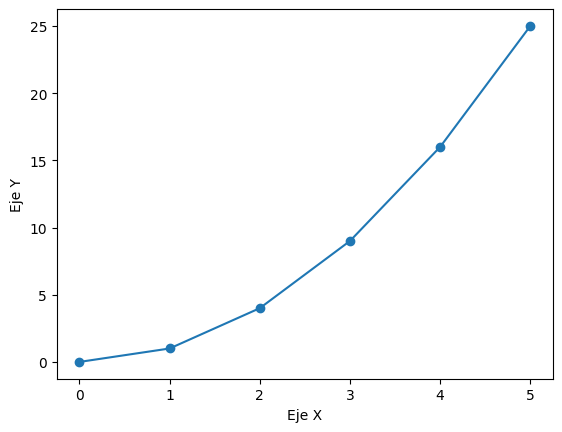

In [74]:
#Ejemplo de una linea simple de matplotlib, Grafico de puntos
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

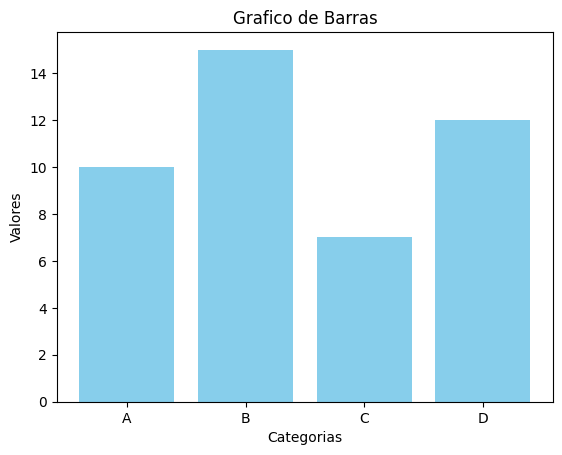

In [75]:
#Grafico de barras

categorias = ['A', 'B', 'C', 'D']
valores = [10, 15, 7, 12]
plt.bar(categorias, valores, color ='skyblue')
plt.title("Grafico de Barras")
plt.xlabel("Categorias")
plt.ylabel("Valores")
plt.show()


In [76]:
plt.style.use('ggplot')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [77]:
import pandas as pd
import numpy as np

np.random.seed(2) #Para reproducibilidad

species = np.array(["setosa", "versicolor", "virginica"])

#genearmos datos aleatorios para longitud y ancho del sépalo

sepal_length = np.random.uniform(-0.5, 15.0, 50)   # rango MUY amplio
sepal_width  = np.random.uniform(-0.5, 12.0, 50)   # rango MUY amplio
species_col  = np.random.choice(species, 50)

data = np.column_stack((sepal_length, sepal_width, species_col))

df = pd.DataFrame(data, columns=["sepal_length", "sepal_width", "species"])
df["sepal_length"] = df["sepal_length"].astype(float).round(2)
df["sepal_width"]  = df["sepal_width"].astype(float).round(2)

df


,sepal_length,sepal_width,species
0,6.26,6.30,virginica
1,-0.10,0.53,versicolor
2,8.02,4.08,versicolor
3,6.25,10.14,setosa
4,6.02,4.58,versicolor
5,4.62,-0.16,setosa
6,2.67,2.59,virginica
7,9.10,0.34,setosa
8,4.14,11.92,versicolor
9,3.64,11.63,versicolor


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

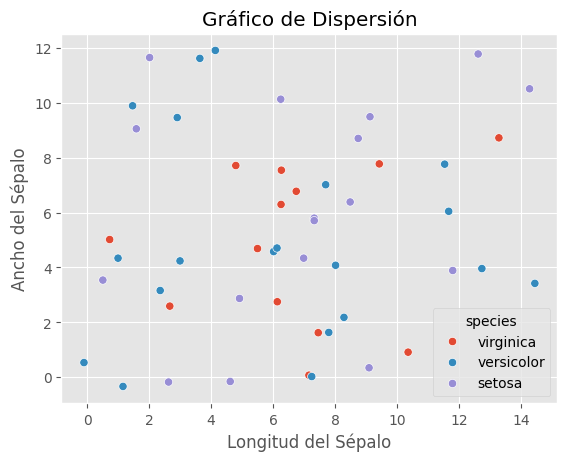

In [79]:
#Grafico de dispersion
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df)
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Gráfico de Dispersión")
plt.title
plt.show()

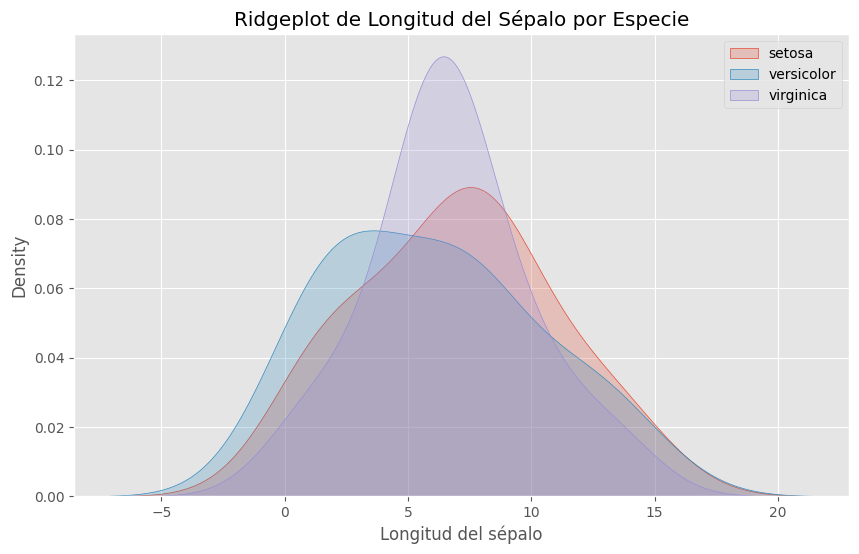

In [80]:
#Grafica de ridgeplot
setosa = df[df["species"] == "setosa"]
versicolor = df[df["species"] == "versicolor"]
virginica = df[df["species"] == "virginica"]

#Configuracion de la figura y los ejes
fig , ax = plt.subplots(figsize=(10,6))
plt.xlabel("Longitud del sépalo")
#Crear el ridgeplot usando el kdeplot de seaborn (usar sepal_length existente)
sns.kdeplot(x=setosa["sepal_length"], ax=ax, fill=True, label="setosa")
sns.kdeplot(x=versicolor["sepal_length"], ax=ax, fill=True, label="versicolor")
sns.kdeplot(x=virginica["sepal_length"], ax=ax, fill=True, label="virginica")

#Ajustar la posicion de las leyendas
ax.legend(loc="upper right")
plt.title("Ridgeplot de Longitud del Sépalo por Especie")
plt.show()

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = sns.load_dataset("iris")
data, set(data["species"])

(     sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 {'setosa', 'versicolor', 'virginica'})

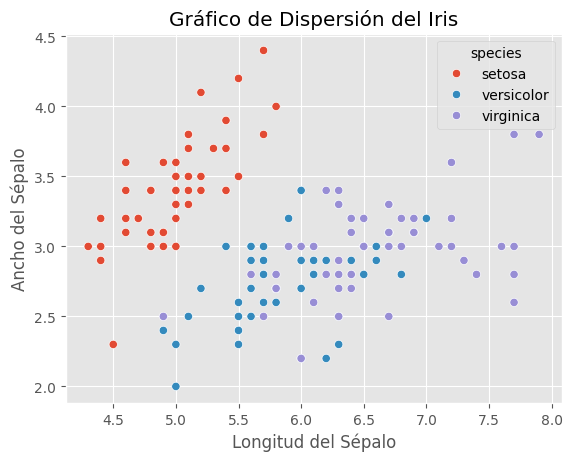

In [84]:
#Grafica de dispersión
sns.scatterplot(x="sepal_length", y = "sepal_width", hue="species", data=data)
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Gráfico de Dispersión del Iris")
plt.show()

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#Generar datos de ejemplo
np.random.seed(42)
edad_autos = np.random.randint(0,20, size =200)
precios_autos = 30 - edad_autos + np.random.normal(-3, 3, size=200)
dato = pd.DataFrame({
    "edad": edad_autos,
    "precio": precios_autos
})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


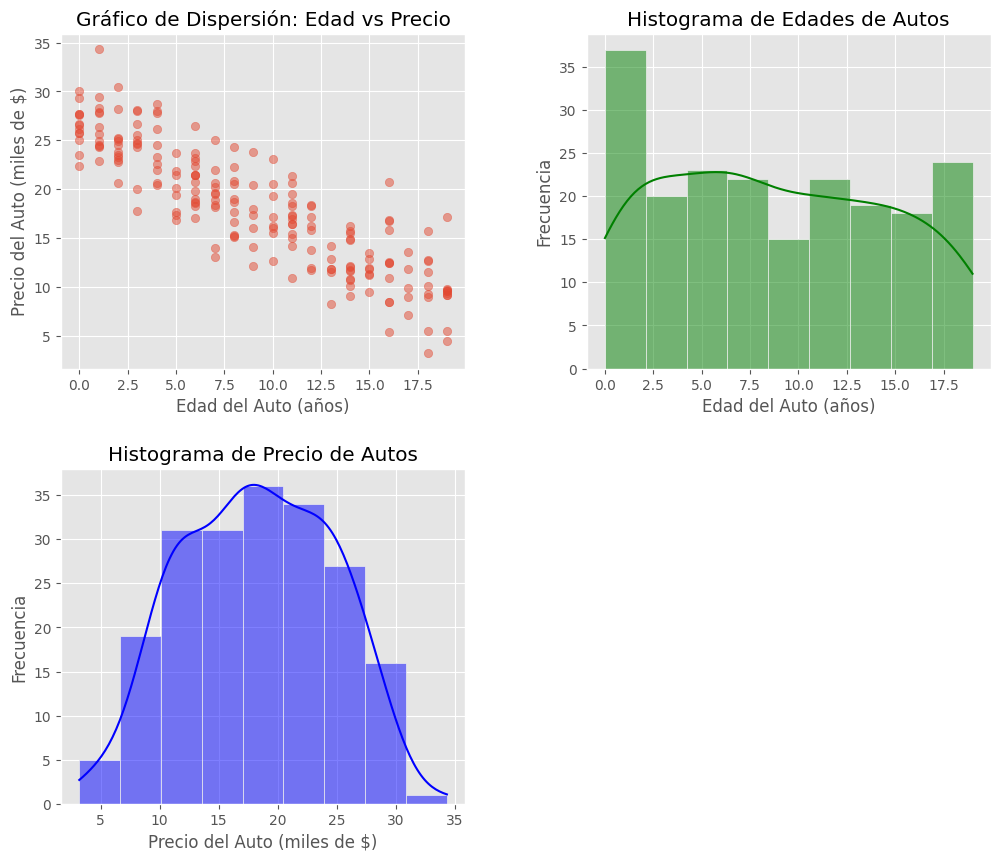

In [116]:
#Creacion del grafico
fig, ax = plt.subplots(2,2, figsize=(12,10))


#Grafica de dispersión
ax[0,0].scatter(dato["edad"], dato["precio"], alpha=0.5)
ax[0,0].set_xlabel("Edad del Auto (años)")
ax[0,0].set_ylabel("Precio del Auto (miles de $)")
ax[0,0].set_title("Gráfico de Dispersión: Edad vs Precio")

#Histograma de edades
sns.histplot(dato["edad"], ax = ax[0,1], kde=True, color = "green", alpha = 0.5)
ax[0,1].set_xlabel("Edad del Auto (años)")
ax[0,1].set_ylabel("Frecuencia")
ax[0,1].set_title("Histograma de Edades de Autos")

#Histograma de precios
sns.histplot(dato["precio"], ax = ax[1,0], kde=True, color = "blue", alpha = 0.5)
ax[1,0].set_xlabel("Precio del Auto (miles de $)")
ax[1,0].set_ylabel("Frecuencia")
ax[1,0].set_title("Histograma de Precio de Autos")


#Eliminar el cuarto subplot (ax[1,1]) si no se usa
ax[1,1].axis('off')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [117]:
#Grafica de dispersión
ax[0,0].scatter(dato["edad"], dato["precio"], alpha=0.5)
ax[0,0].set_xlabel("Edad del Auto (años)")
ax[0,0].set_ylabel("Precio del Auto (miles de $)")
ax[0,0].set_title("Gráfico de Dispersión: Edad vs Precio")

Text(0.5, 1.0, 'Gráfico de Dispersión: Edad vs Precio')

In [118]:
#Histograma de edades
sns.histplot(dato["edad"], ax = ax[0,1], kde=True, color = "green", alpha = 0.5)
ax[0,1].set_xlabel("Edad del Auto (años)")
ax[0,1].set_ylabel("Frecuencia")
ax[0,1].set_title("Histograma de Edades de Autos")


Text(0.5, 1.0, 'Histograma de Edades de Autos')

In [119]:
#Histograma de precios
sns.histplot(dato["precio"], ax = ax[1,0], kde=True, color = "blue", alpha = 0.5)
ax[1,0].set_xlabel("Precio del Auto (miles de $)")
ax[1,0].set_ylabel("Frecuencia")
ax[1,0].set_title("Histograma de Precio de Autos")

Text(0.5, 1.0, 'Histograma de Precio de Autos')

In [120]:
#Eliminar el cuarto subplot (ax[1,1]) si no se usa
ax[1,1].axis('off')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

<Figure size 640x480 with 0 Axes>